In [ ]:
%load_ext autoreload
%autoreload 2

In [88]:
from __init__ import *
from new_solutions.simple_problem import study_many_problems
from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from itertools import accumulate
from operator import add 
from functools import reduce
from visuals.plotter import plot_general
# from unit_tests.test_solutions import *
from typing import Literal, List
from enum import Enum
from collections import Counter
from typing import TypeVar
from typing import Any
from domains.domain import Domain

import plotly.io as pio
pio.renderers.default = "browser"

from fixes.problem_types.side_hole_id2 import *
import pickle

In [53]:
# report = run_new_layout()
# c = Cook(report)
# c.run_again()
# layout = c.bl_hist[1].layout

executer> 
 begining to execute stacking
helloo!
first bl to try -> node: m_bath, action: SQUEEZE, summary: Counter({'OVERLAP': 3}), # unres probs: 3
problem this fixes -> Problem(index=2, problem_type=ProblemType.HOLE, resolved=False, nbs=['transit_space', 'laundry', 'm_bath', 'bath']
0


In [59]:
with open('test_layout.pickle', 'rb') as handle:
    lo = pickle.load(handle)

In [60]:
lo

Layout(shapes={'bedroom_1': <POLYGON ((3.22 -2.8, 3.22 0, 0 0, 0 -2.8, 3.22 -2.8))>, 'kitchen': <POLYGON ((5.02 -5.77, 5.02 -3.53, 3.22 -3.53, 3.22 -5.77, 5.02 -5.77))>, 'm_bath': <POLYGON ((7.14 -1.3, 7.14 0, 5.02 0, 5.02 -1.3, 7.14 -1.3))>, 'm_bedroom': <POLYGON ((9.27 -2.74, 9.27 0, 8.38 0, 8.38 -2.74, 9.27 -2.74))>, 'm_closet': <POLYGON ((9.2 -3.34, 9.2 -2.74, 8.2 -2.74, 8.2 -3.34, 9.2 -3.34))>, 'bath': <POLYGON ((7.34 -2.53, 7.34 -1.3, 5.02 -1.3, 5.02 -2.53, 7.34 -2.53))>, 'dining': <POLYGON ((8.38 -5.68, 8.38 -2.53, 5.02 -2.53, 5.02 -5.68, 8.38 -5.68))>, 'transit_space': <POLYGON ((5.02 -3.53, 5.02 -1.75, 3.22 -1.75, 3.22 -3.53, 5.02 -3.53))>, 'closet': <POLYGON ((9.38 -5.75, 9.38 -3.34, 8.38 -3.34, 8.38 -5.75, 9.38 -5.75))>, 'bedroom_2': <POLYGON ((3.22 -5.95, 3.22 -2.8, 0 -2.8, 0 -5.95, 3.22 -5.95))>, 'laundry': <POLYGON ((4.82 -1.75, 4.82 0, 3.22 0, 3.22 -1.75, 4.82 -1.75))>}, domains={'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[-2.80-0.00]), 'kitchen': Domain(kitchen, x=

In [98]:
get_side_hole_problems(lo)

[Problem(index=0, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['laundry', 'm_bath'],
 Problem(index=1, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['m_bath', 'm_bedroom']]

In [61]:
group_nodes_on_edge(lo.graph)

[(<Direction.EAST: 2>, ['m_bedroom', 'm_closet', 'closet']),
 (<Direction.NORTH: 0>, ['bedroom_1', 'm_bath', 'm_bedroom', 'laundry']),
 (<Direction.SOUTH: 1>, ['kitchen', 'dining', 'closet', 'bedroom_2']),
 (<Direction.WEST: 3>, ['bedroom_1', 'bedroom_2'])]

In [93]:
v1, v2 = check_for_side_holes(lo)
v1


(Domain(laundry, x=[3.22-4.82], y=[-1.75-0.00]),
 Domain(m_bath, x=[5.02-7.14], y=[-1.30-0.00]),
 'x')

In [79]:
tree = find_geometric_holes(list(lo.shapes.values()))
tree.geometries

array([<POLYGON ((5.02 0, 5.02 -1.3, 5.02 -1.75, 4.82 -1.75, 4.82 0, 5.02 0))>,
       <POLYGON ((8.38 0, 8.38 -2.53, 7.34 -2.53, 7.34 -1.3, 7.14 -1.3, 7.14 0, 8.3...>,
       <POLYGON ((9.38 -3.34, 9.2 -3.34, 9.2 -2.74, 9.27 -2.74, 9.27 0, 9.38 -3.34))>,
       <POLYGON ((3.22 -5.95, 3.22 -5.77, 5.02 -5.77, 5.02 -5.68, 8.38 -5.68, 8.38 ...>],
      dtype=object)

In [97]:
v1[:1]
p

Domain(laundry, x=[3.22-4.82], y=[-1.75-0.00])

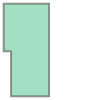

In [91]:
match_geometry(*v2, tree)

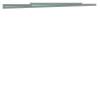

In [83]:
tree.geometries[3]